# Descriptive analysis of the data 

In [81]:
# used libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
from pandas import DataFrame

### Analyse the average prices for each route

In [94]:
# Read in data into a dataframe 
flight_data = pd.read_csv("./data/train.csv", parse_dates=['Flight_Date','Request_Date'])

# Display top of dataframe
flight_data.head()

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00+00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


In [95]:
# See the column data types and non-missing values 
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Request_Date      83624 non-null  datetime64[ns, UTC]
 1   Flight_Date       83624 non-null  datetime64[ns]     
 2   Departure_hour    83624 non-null  int64              
 3   flight_unique_id  83624 non-null  object             
 4   route_abb         83624 non-null  object             
 5   flight_number     83624 non-null  object             
 6   Price             83624 non-null  float64            
 7   Currency          83624 non-null  object             
 8   min_future_price  83624 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.7+ MB


There are no data quality issues. There are 83.624 instances in the given training data set with no missing data values. 

In [96]:
# transform the date data to calculate the duration between request and flight date
flight_data['Request_Date'] = flight_data['Request_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
flight_data['Flight_Date'] =flight_data['Flight_Date'] + pd.to_timedelta(flight_data['Departure_hour'], 'h')

In [97]:
# transform data type of Request_Date back to datetime64[ns, UTC] 
flight_data['Request_Date'] = pd.to_datetime(flight_data['Request_Date'])

In [98]:
# Create new feature duration time between request and flight date 
Duration_Time = flight_data['Flight_Date'] - flight_data['Request_Date']
Duration_Time = -1 * Duration_Time.apply(lambda x: x.total_seconds())     
Duration_Time = divmod(Duration_Time, 3600)[0]
flight_data.insert(2, "Duration_Time", Duration_Time, True)

In [99]:
flight_data.head()

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00,2019-06-05 19:00:00,-56.0,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00,2019-06-05 19:00:00,-44.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00,2019-06-05 19:00:00,-32.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00,2019-06-05 19:00:00,-20.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00,2019-06-05 21:00:00,-58.0,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


In [100]:
# Split the data set into smaller groups, splitted by routes and we receive four groupes
g_routes = flight_data.groupby('route_abb')

In [111]:
# Show the dataframe for each route 
#for route_abb, route_abb_df in g_routes:
#    print(route_abb)
#    print(route_abb_df)

### We analyse the requested prices and the min future price for the route STN-FRA.

In [102]:
# get a specific group from the splitted data set, we take route STN-FRA
g_stn_fra = g_routes.get_group('STN-FRA')

In [103]:
# show the min, max and median prices in regards to the duration time
round(g_stn_fra.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median']), 2)

,count,min,max,median
Duration_Time,,,,
-2360.0,1,39.46,39.46,39.46
-2348.0,2,19.99,39.46,29.72
-2336.0,3,19.99,50.38,39.46
-2325.0,1,19.99,19.99,19.99
-2324.0,3,19.99,50.38,31.20
-2313.0,1,19.99,19.99,19.99
-2312.0,3,19.99,63.23,19.99
-2301.0,1,19.99,19.99,19.99
-2300.0,4,19.99,39.46,23.43


In [104]:
route_a_price = round(g_stn_fra.groupby('Duration_Time').median(), 2)
route_a_price.index.name = 'Duration_Time'
route_a_price.reset_index(inplace=True)
route_a_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2360.0,19,39.46,19.99
1,-2348.0,13,29.72,18.98
2,-2336.0,19,39.46,19.99
3,-2325.0,8,19.99,19.99
4,-2324.0,19,31.20,19.99


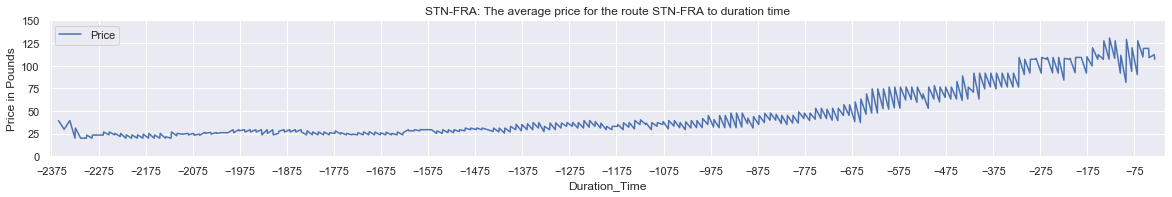

In [105]:
# print("The average requested price for the route STN-FRA to the hours before flight")
df = DataFrame(route_a_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-FRA: The average price for the route STN-FRA to duration time')

plt.grid(True)
plt.xlim(-2380, -10)
plt.ylim(0, 150)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested prices and the min future price for the route FRA-STN.

In [106]:
# get a specific group from the splitted data set, we take route FRA-STN
g_fra_stn = g_routes.get_group('FRA-STN')

In [107]:
# show the min, max and median prices in regards to the duration time
g_fra_stn.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2359.0,1,30.33,30.33,30.330
-2347.0,2,19.99,30.33,25.160
-2335.0,3,19.99,30.33,30.330
-2324.0,1,30.33,30.33,30.330
-2323.0,3,19.99,30.33,25.130
-2312.0,1,30.33,30.33,30.330
-2311.0,4,19.99,30.33,26.865
-2300.0,1,30.33,30.33,30.330
-2299.0,5,19.99,59.10,28.600


In [108]:
route_b_price = g_fra_stn.groupby('Duration_Time').median()
route_b_price.index.name = 'Duration_Time'
route_b_price.reset_index(inplace=True)
route_b_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2359.0,18,30.33,19.990
1,-2347.0,12,25.16,18.985
2,-2335.0,18,30.33,19.990
3,-2324.0,7,30.33,17.990
4,-2323.0,18,25.13,19.990


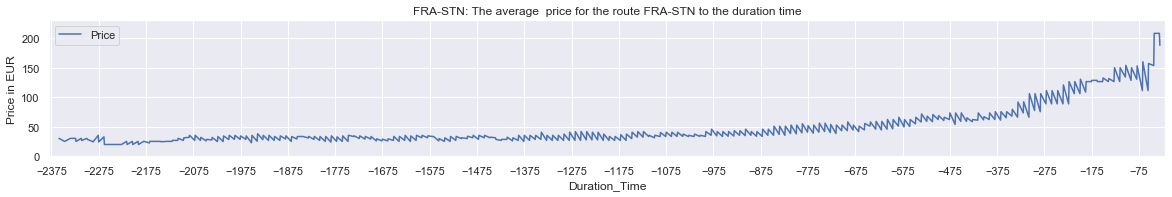

In [109]:
# print("The average requested price for the route FRA-STN to the hours before flight")
df = DataFrame(route_b_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in EUR')
plt.title('FRA-STN: The average  price for the route FRA-STN to the duration time')

plt.grid(True)
plt.xlim(-2380, -20)
plt.ylim(0, 230)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested prices and the min future price for the route STN-SXF.

In [110]:
# get a specific group from the splitted data set, we take route STN-SXF
g_stn_sxf = g_routes.get_group('STN-SXF')

In [112]:
g_stn_sxf.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2372.0,1,19.99,19.99,19.99
-2371.0,1,19.99,19.99,19.99
-2360.0,3,19.99,19.99,19.99
-2359.0,1,19.99,19.99,19.99
-2348.0,4,19.99,19.99,19.99
...,...,...,...,...
-32.0,54,74.45,228.47,182.57
-31.0,21,25.29,228.47,186.21
-22.0,4,88.73,223.37,127.49


In [113]:
route_c_price = g_stn_sxf.groupby('Duration_Time').median()
route_c_price.index.name = 'Duration_Time'
route_c_price.reset_index(inplace=True)
route_c_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2372.0,7,19.99,9.99
1,-2371.0,6,19.99,9.99
2,-2360.0,19,19.99,17.99
3,-2359.0,6,19.99,9.99
4,-2348.0,13,19.99,13.99


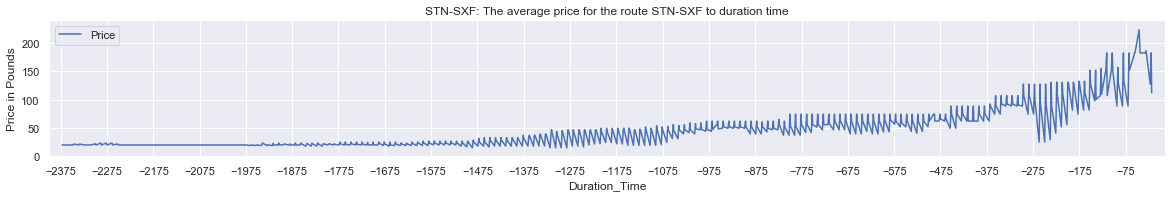

In [114]:
# print("The average price for the route STN-SXF to the hours before flight")
df = DataFrame(route_c_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-SXF: The average price for the route STN-SXF to duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 240)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested prices and the min future price for the route SXF-STN.

In [115]:
# get a specific group from the splitted data set, we take route SXF-STN
g_sxf_stn = g_routes.get_group('SXF-STN')

In [116]:
g_sxf_stn.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2375.0,1,28.55,28.55,28.55
-2371.0,1,19.99,19.99,19.99
-2363.0,2,19.99,28.55,24.27
-2359.0,2,19.99,73.43,46.71
-2351.0,3,25.13,28.55,25.13
...,...,...,...,...
-31.0,57,50.99,266.13,180.53
-23.0,51,50.99,266.13,208.07
-22.0,1,111.17,111.17,111.17


In [117]:
route_d_price = g_sxf_stn.groupby('Duration_Time').median()
route_d_price.index.name = 'Duration_Time'
route_d_price.reset_index(inplace=True)
route_d_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2375.0,10,28.55,9.99
1,-2371.0,6,19.99,9.99
2,-2363.0,16,24.27,16.82
3,-2359.0,12,46.71,27.94
4,-2351.0,10,25.13,23.65


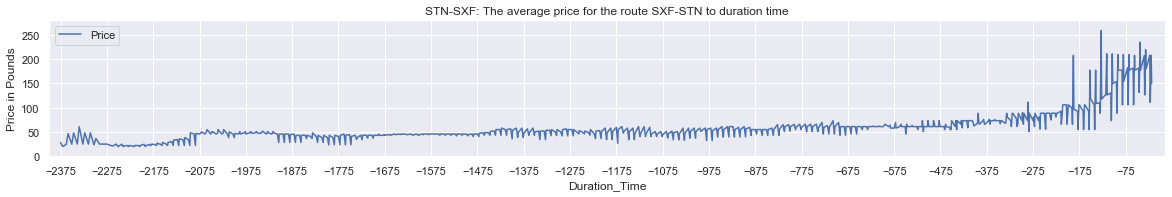

In [118]:
# print("The average price for the route SXF-STN to the hours before flight")
df = DataFrame(route_d_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-SXF: The average price for the route SXF-STN to duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 280)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested average prices for all routes.

In [119]:
# Aggregated Average Minimum Price for all routes 
route_all_price = flight_data.groupby('Duration_Time').median()
route_all_price.index.name = 'Duration_Time'
route_all_price.reset_index(inplace=True)
route_all_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2375.0,10,28.55,9.99
1,-2372.0,7,19.99,9.99
2,-2371.0,6,19.99,9.99
3,-2363.0,16,24.27,16.82
4,-2360.0,19,19.99,17.99


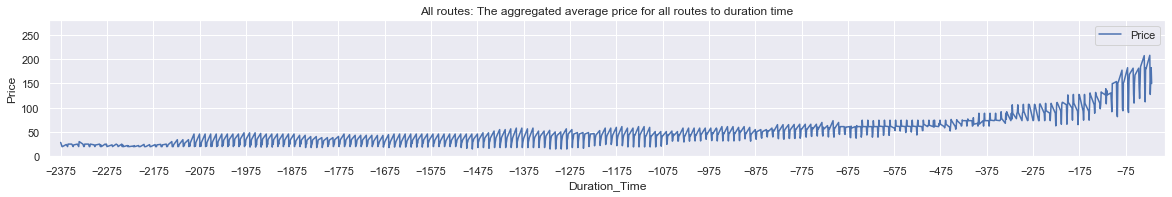

In [120]:
# print("The average minimum price for all route to hours before flight")
df = DataFrame(route_all_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price')
plt.title('All routes: The aggregated average price for all routes to duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 280)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

## Analyse the price in regards to the weekday 

In [121]:
train_data = pd.read_csv("./data/converted_train_2020_07_09_00-15-27.csv", parse_dates=['Flight_Date','Request_Date'])
train_data.head()

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour
0,0,2019-06-03,2019-06-05,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,208.070000,259.070000,Monday,Morning,Evening,907.2,11:00
1,1,2019-06-03,2019-06-05,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Monday,Night,Evening,907.2,23:00
2,2,2019-06-04,2019-06-05,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Morning,Evening,907.2,11:00
3,3,2019-06-04,2019-06-05,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Night,Evening,907.2,23:00
4,4,2019-06-03,2019-06-05,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,112.979088,197.946027,Monday,Morning,Night,907.2,11:00


In [122]:
train_data['Request_Weekday_num'] = train_data.Request_Weekday.map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6 })

In [123]:
# Split the data set into smaller groups, splitted by routes and we receive four groupes
g_weekday = train_data.groupby('Request_Weekday_num')

In [124]:
# get a specific group from the splitted data set, we take weekday 0 = Monday
g_monday = g_weekday.get_group(0)

In [125]:
price_monday = g_monday.groupby('Request_Date').median()
price_monday.index.name = 'Request_Date'
price_monday.reset_index(inplace=True)
price_monday.drop(columns=['Price', 'min_future_price'])
price_monday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-03,23962.0,1256.0,41.66,30.33,38.550000,28.550000,907.2,0.0
1,2019-06-10,26491.5,1148.0,45.89,33.04,41.776989,30.330000,907.2,0.0
2,2019-06-17,31402.0,1100.0,49.41,36.40,45.890000,33.450000,907.2,0.0
3,2019-06-24,36063.5,1027.0,47.73,37.27,45.890000,35.263429,907.2,0.0
4,2019-07-01,41076.5,943.5,53.03,42.83,49.923581,40.790000,907.2,0.0
5,2019-07-08,45193.5,848.0,65.27,43.34,61.190000,42.804006,907.2,0.0
6,2019-07-15,49168.0,752.0,62.21,43.85,62.210000,42.830000,907.2,0.0
7,2019-07-22,53470.0,659.0,55.58,50.38,54.990000,45.890000,907.2,0.0
8,2019-07-29,56357.5,543.0,73.43,62.21,67.334813,61.190000,907.2,0.0


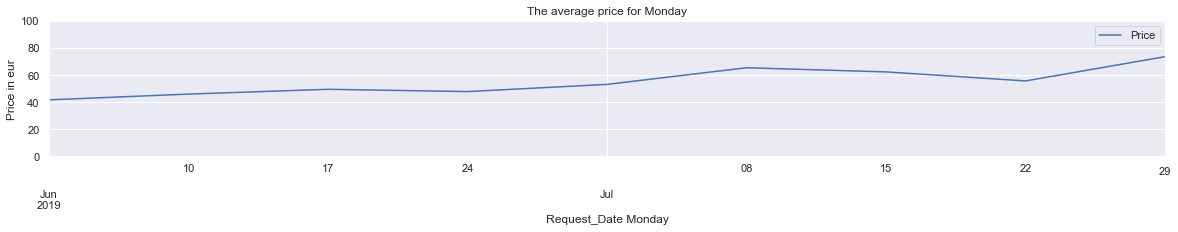

In [126]:
# print("The average prices for the specific weekday 0")
df = DataFrame(price_monday,columns=['Request_Date','Price'])
df.plot(x = 'Request_Date', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Monday')
plt.ylabel('Price in eur')
plt.title('The average price for Monday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [127]:
# get a specific group from the splitted data set, we take weekday 1 = Tuesday
g_tuesday = g_weekday.get_group(1)

In [128]:
price_tuesday = g_tuesday.groupby('Request_Date').median()
price_tuesday.index.name = 'Request_Date'
price_tuesday.reset_index(inplace=True)
price_tuesday.drop(columns=['Price', 'min_future_price'])
price_tuesday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-04,23866.0,1231.0,45.89,30.33,45.890000,29.319035,907.2,1.0
1,2019-06-11,27449.5,1148.0,43.34,33.04,41.700689,30.330000,907.2,1.0
2,2019-06-18,33049.0,1112.0,49.41,36.40,45.890000,33.320498,907.2,1.0
3,2019-06-25,37347.0,1027.5,48.44,38.55,45.890000,36.045000,907.2,1.0
4,2019-07-02,41937.5,932.0,55.82,43.34,52.860813,41.868268,907.2,1.0
5,2019-07-09,45858.0,836.0,62.21,43.34,61.190000,42.830000,907.2,1.0
6,2019-07-16,50211.5,742.0,61.19,43.34,56.150746,42.830000,907.2,1.0
7,2019-07-23,54326.0,655.0,61.19,50.99,55.883243,46.720583,907.2,1.0
8,2019-07-30,57093.5,535.0,74.45,62.21,73.430000,61.190000,907.2,1.0


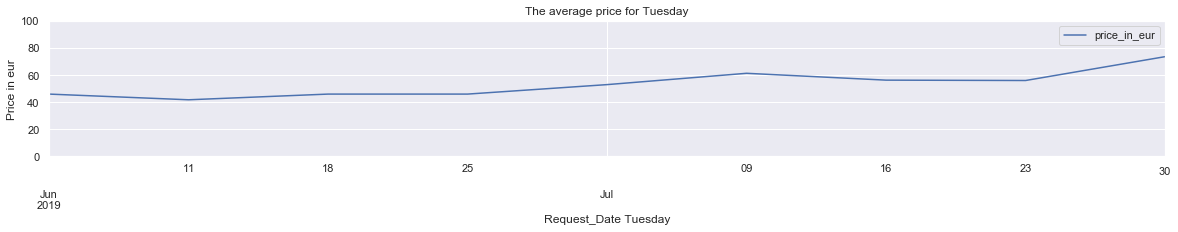

In [129]:
# print("The average prices for the specific weekday 1")
df = DataFrame(price_tuesday,columns=['Request_Date','price_in_eur'])
df.plot(x = 'Request_Date', y='price_in_eur', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Tuesday')
plt.ylabel('Price in eur')
plt.title('The average price for Tuesday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [130]:
# get a specific group from the splitted data set, we take weekday 2 = Wednesday
g_wednesday = g_weekday.get_group(2)

In [131]:
price_wednesday = g_wednesday.groupby('Request_Date').median()
price_wednesday.index.name = 'Request_Date'
price_wednesday.reset_index(inplace=True)
price_wednesday.drop(columns=['Price', 'min_future_price'])
price_wednesday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-05,24456.0,1220.0,45.890,30.33,45.890000,29.283682,907.2,2.0
1,2019-06-12,28140.5,1137.5,40.790,34.26,40.790000,32.600316,907.2,2.0
2,2019-06-19,32165.5,1075.0,48.085,37.27,45.890000,34.260000,907.2,2.0
3,2019-06-26,36557.5,983.0,49.410,38.55,45.890000,37.479305,907.2,2.0
4,2019-07-03,42799.0,931.0,62.410,43.34,61.190000,42.523550,907.2,2.0
5,2019-07-10,46347.0,824.0,56.910,43.34,55.944209,42.095297,907.2,2.0
6,2019-07-17,50642.0,728.0,61.190,43.85,56.200514,43.119282,907.2,2.0
7,2019-07-24,54940.5,635.0,62.210,50.99,56.365119,50.731281,907.2,2.0
8,2019-07-31,57400.0,512.0,75.470,66.21,73.430000,65.190000,907.2,2.0


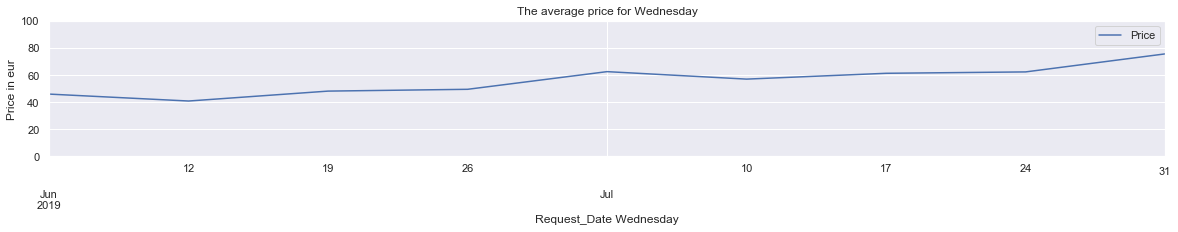

In [132]:
# print("The average prices for the specific weekday 2")
df = DataFrame(price_wednesday,columns=['Request_Date','Price'])
df.plot(x = 'Request_Date', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Wednesday')
plt.ylabel('Price in eur')
plt.title('The average price for Wednesday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [133]:
# get a specific group from the splitted data set, we take weekday 5 = Saturday
g_saturday = g_weekday.get_group(5)

In [134]:
price_saturday = g_saturday.groupby('Request_Date').median()
price_saturday.index.name = 'Request_Date'
price_saturday.reset_index(inplace=True)
price_saturday.drop(columns=['Price', 'min_future_price'])
price_saturday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-08,26188.5,1195.0,39.46,31.20,37.475000,29.361326,907.2,5.0
1,2019-06-15,29524.0,1100.0,46.81,36.71,44.039792,33.219248,907.2,5.0
2,2019-06-22,35448.0,1063.0,45.89,36.71,42.673006,33.650000,907.2,5.0
3,2019-06-29,40397.0,980.0,48.95,39.77,45.890000,38.550000,907.2,5.0
4,2019-07-06,44630.0,887.0,73.43,43.34,66.764527,42.830000,907.2,5.0
5,2019-07-13,48550.0,788.0,62.21,43.85,61.190000,42.830000,907.2,5.0
6,2019-07-20,53206.0,703.0,56.61,43.85,55.830987,42.830000,907.2,5.0
7,2019-07-27,56109.5,584.0,62.21,61.19,61.190000,55.928656,907.2,5.0
8,2019-08-03,59359.0,477.0,75.47,75.47,75.430000,75.430000,907.2,5.0


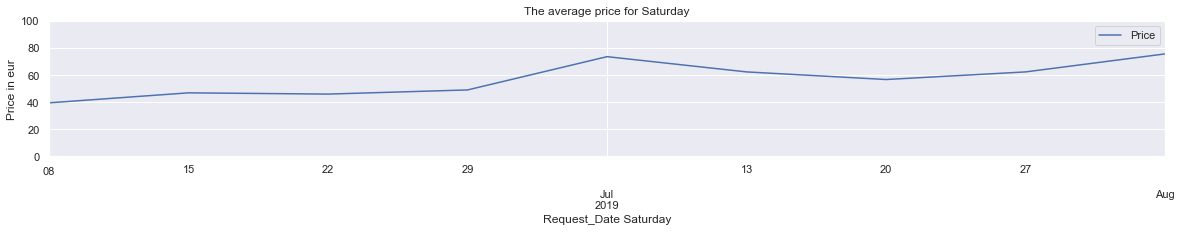

In [135]:
# print("The average prices for the specific weekday 5")
df = DataFrame(price_saturday,columns=['Request_Date','Price'])
df.plot(x = 'Request_Date', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Saturday')
plt.ylabel('Price in eur')
plt.title('The average price for Saturday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

## Analyse the price changes and price differences

In [136]:
data = pd.read_csv('data/converted_test_2020_06_24_14-47-10.csv',parse_dates=['Flight_Date','Request_Date'])

In [137]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-06-03 11:00:00,2019-07-02 07:00:00,692.0,7,2019-07-02 FR 145,STN-SXF,FR 145,26.87,£,23.811657,Monday,AM
1,1,2019-06-03 23:00:00,2019-07-02 07:00:00,680.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,34.968663,Monday,PM
2,2,2019-06-04 11:00:00,2019-07-02 07:00:00,668.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,35.016015,Tuesday,AM
3,3,2019-06-04 23:00:00,2019-07-02 07:00:00,656.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,35.016015,Tuesday,PM
4,4,2019-06-05 11:00:00,2019-07-02 07:00:00,644.0,7,2019-07-02 FR 145,STN-SXF,FR 145,39.46,£,34.973793,Wednesday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,5578,2019-07-30 23:00:00,2019-08-02 22:00:00,71.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,42.83,€,42.830000,Tuesday,PM
5579,5579,2019-07-31 11:00:00,2019-08-02 22:00:00,59.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,50.99,€,50.990000,Wednesday,AM
5580,5580,2019-07-31 23:00:00,2019-08-02 22:00:00,47.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,50.99,€,50.990000,Wednesday,PM
5581,5581,2019-08-01 11:00:00,2019-08-02 22:00:00,35.0,22,2019-08-02 FR 8545,SXF-STN,FR 8545,50.99,€,50.990000,Thursday,AM


In [138]:
# First Request Date 
data.Request_Date.min()

Timestamp('2019-06-03 11:00:00')

In [139]:
# Last Request Date 
data.Request_Date.max()

Timestamp('2019-08-01 23:00:00')

### Price changes within the requests and different routes
The data show the total number of price requests and unique number of price changes per route from 03.06.19-01.08.19.
It shows the min, max, mean prices for each route and the max difference of price changes per route.

Route FRA-STN: 786 price requests, 68 price changes, max. price difference: 242.14€
Route STN-FRA: 1250 price requests, 588 price changes, max. price difference: 223.05€
Route STN-SXF: 2021 different flights, 555 price changes, max. price difference: 187.91€
Route SXF-STN: 1526 different flights, 66 price changes, max. price difference: 285.83€

In [140]:
#number of flights per route
data.groupby('route_abb').flight_number.size()

route_abb
FRA-STN     786
STN-FRA    1250
STN-SXF    2021
SXF-STN    1526
Name: flight_number, dtype: int64

In [141]:
# data show which flight numbers belong to which route 
data.groupby('route_abb').flight_number.unique()

route_abb
FRA-STN                    [FR 1546, FR 1686]
STN-FRA                    [FR 1687, FR 1547]
STN-SXF    [FR 145, FR 8544, FR 8542, FR 147]
SXF-STN    [FR 8545, FR 8543, FR 144, FR 146]
Name: flight_number, dtype: object

In [85]:
# number of unique flight id's per route 
data.groupby('route_abb').flight_unique_id.nunique()

route_abb
FRA-STN     9
STN-FRA    14
STN-SXF    25
SXF-STN    17
Name: flight_unique_id, dtype: int64

In [142]:
##number of price changes aggregated over each route 
price_route = round(data.groupby('route_abb').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean']), 2)
price_route = pd.DataFrame(price_route) 
#price_route

In [143]:
# calculates the difference between the min and max price for each route
max_price_change_route = price_route['max'] - price_route['min']
price_route['max_price_change'] = max_price_change_route
price_route

,count,nunique,min,max,mean,max_price_change
route_abb,,,,,,
FRA-STN,786,68,19.99,262.13,65.54,242.14
STN-FRA,1250,588,16.08,239.13,72.98,223.05
STN-SXF,2021,555,19.62,207.53,99.80,187.91
SXF-STN,1526,66,9.99,295.82,69.21,285.83


In [88]:
%matplotlib inline

In [89]:
sns.set(rc={'figure.figsize':(11, 4)})

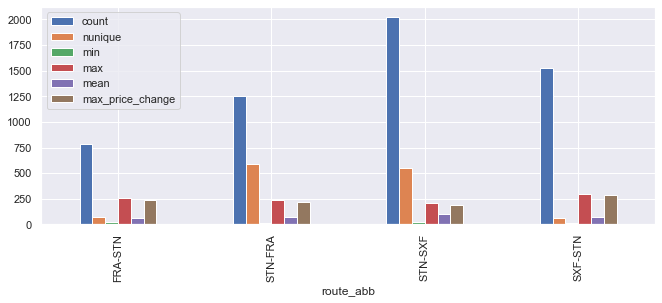

In [90]:
# plot shows number of price changes and values (y-axis) aggregated over each route (x-axis)
price_route.plot(kind = 'bar')

The data show the number of price requests and unique number of price changes per flight with same flight number from 28.07.19-02.08.19. It shows the min, max, mean prices for each flight and the max difference of price changes per flight. 

In [91]:
# number of price changes aggregated over each flight number 
price_flight_number = round(data.groupby('flight_number').price_in_eur.agg(['count', 'nunique', 'min', 'max', 'mean']), 2)
price_flight_number = pd.DataFrame(price_flight_number) 

In [92]:
# calculates the difference between the min and max price for each flight
max_price_difference_flight = price_flight_number['max'] - price_flight_number['min']
price_flight_number['max_price_change'] = max_price_difference_flight
price_flight_number

,count,nunique,min,max,mean,max_price_change
flight_number,,,,,,
FR 144,283,30,9.99,152.99,45.59,143.00
FR 145,553,244,19.62,203.73,97.36,184.11
FR 146,213,21,19.99,262.13,107.68,242.14
FR 147,562,270,26.01,207.53,104.61,181.52
FR 1546,337,47,19.99,262.13,72.98,242.14
FR 1547,509,315,20.99,238.60,69.52,217.61
FR 1686,449,54,19.99,219.29,59.96,199.30
FR 1687,741,429,16.08,239.13,75.35,223.05
FR 8542,394,228,23.94,203.73,94.49,179.79


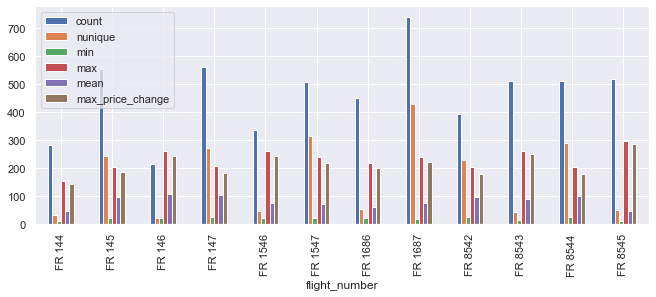

In [93]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
price_flight_number.plot(kind = 'bar')

The data show the number of price requests and unique number of price changes per unique flight from 28.07.19-02.08.19. It shows the min, max, mean prices for each flight and the max difference of price changes per unique flight. 

In [146]:
##number of price changes aggregated over each unique flight id
price_flight_id = round(data.groupby('flight_unique_id').price_in_eur.agg(['min', 'max', 'mean']), 2)
price_flight_id = pd.DataFrame(price_flight_id) 

In [148]:
# calculates the difference between the min and max price for each flight id
max_price_difference_flight_id = price_flight_id['max'] - price_flight_id['min']
price_flight_id['max_price_change'] = max_price_difference_flight_id
price_flight_id.reset_index(inplace=True)
price_flight_id

,index,flight_unique_id,min,max,mean,max_price_change
0,0,2019-07-02 FR 145,19.62,203.01,58.34,183.39
1,1,2019-07-02 FR 1546,30.33,262.13,95.37,231.80
2,2,2019-07-03 FR 8545,14.99,262.13,77.18,247.14
3,3,2019-07-04 FR 8544,33.10,203.01,81.70,169.91
4,4,2019-07-05 FR 8542,23.94,203.22,74.33,179.28
5,5,2019-07-05 FR 8544,43.88,203.22,105.41,159.34
6,6,2019-07-07 FR 1687,29.28,114.03,59.82,84.75
7,7,2019-07-07 FR 8543,73.43,262.13,152.56,188.70
8,8,2019-07-08 FR 8543,61.19,262.13,127.46,200.94
9,9,2019-07-08 FR 8544,29.26,203.22,84.65,173.96


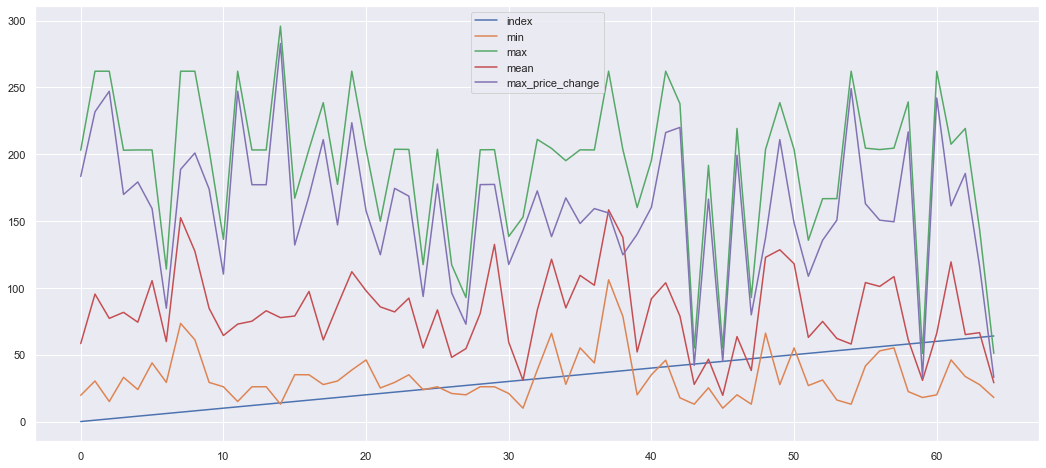

In [149]:
# plot shows number of price changes and values (y-axis) aggregated over each flight with same flight number (x-axis)
sns.set(rc={'figure.figsize':(18, 8)})
price_flight_id.plot()

# Plot for analysing the pricing at AM and PM

In [150]:
# Get unique request date and unique_id
data_am_pm_analysis = data
data_am_pm_analysis['Request_Date'] = pd.to_datetime(data_am_pm_analysis["Request_Date"].dt.strftime('%Y-%m-%d'))
data_am_pm_analysis['Flight_Date'] = pd.to_datetime(data_am_pm_analysis["Flight_Date"].dt.strftime('%Y-%m-%d'))

In [62]:
# check if price changes with the time of the day (AM or PM)
d = {'Request_Date': [], 'flight_unique_id': [], 'am_more_expensive': []}
data_am_pm_analysis_results = pd.DataFrame(d)

# Iterate over normalized data to check if AM price is more expensive than PM price (unique key = Request_Date, flight_unique_id)
for index_x, row_x in data_am_pm_analysis.iterrows():
    # Interate over every entry again to check if unique key appears again (corresponding PM value)
    for index_y, row_y in data_am_pm_analysis.iterrows():
        if row_x.Request_Date == row_y.Request_Date and row_x.flight_unique_id == row_y.flight_unique_id and row_x.Request_AM_PM == 'AM' and row_y.Request_AM_PM == 'PM':
           # print(row_x.Request_Date)
            if row_x.price_in_eur > row_y.price_in_eur:
                new_row = {'Request_Date': row_x.Request_Date, 'flight_unique_id': row_x.flight_unique_id, 'am_more_expensive': 1 }
                data_am_pm_analysis_results = data_am_pm_analysis_results.append(new_row, ignore_index=True)
            else:
                new_row = {'Request_Date': row_x.Request_Date, 'flight_unique_id': row_x.flight_unique_id, 'am_more_expensive': 0 }
                data_am_pm_analysis_results = data_am_pm_analysis_results.append(new_row, ignore_index=True)


# Filtering and plot example 
# data_specific_date = data[data['Request_Date'].astype(str).str.contains('2019-06-03')]
# data_specific_date_specific_flight = data_specific_date[data_specific_date['flight_number'] == 'FR 147']
# data_specific_date_specific_flight[['flight_unique_id', 'price_in_eur']].plot(kind='bar')
# data_specific_date_specific_flight

# for x in data_specific_date_specific_flight.iterrows():
    

KeyboardInterrupt: 

In [63]:
# data show if price in eur was higher in the evening or in the morning
# true if price was higher at AM else it was higher at PM
data_am_pm_analysis_results

,Request_Date,flight_unique_id,am_more_expensive
0,2019-06-03,2019-07-02 FR 145,0.0
1,2019-06-04,2019-07-02 FR 145,0.0
2,2019-06-05,2019-07-02 FR 145,1.0
3,2019-06-06,2019-07-02 FR 145,0.0
4,2019-06-08,2019-07-02 FR 145,0.0
5,2019-06-09,2019-07-02 FR 145,0.0
6,2019-06-10,2019-07-02 FR 145,0.0
7,2019-06-11,2019-07-02 FR 145,1.0
8,2019-06-12,2019-07-02 FR 145,0.0
9,2019-06-13,2019-07-02 FR 145,1.0


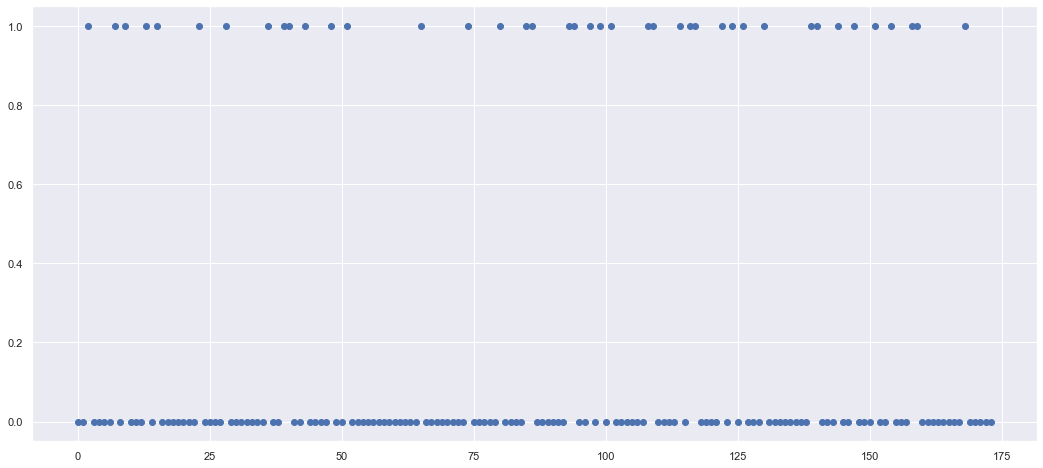

In [74]:
data_am_pm_analysis_results['am_more_expensive'].plot(style='o')

We can the that in 175 price requests, the price for the flight was at PM higher than at AM.

# More plots on time and price

The average price for the period between request and flight in euro


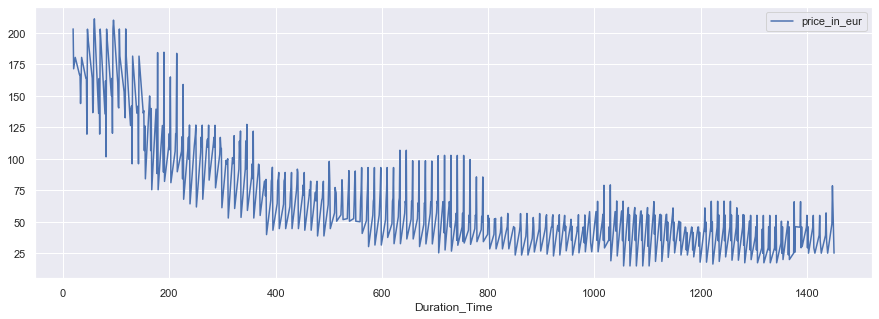

In [156]:
print("The average price for the period between request and flight in euro")
fig, ax = plt.subplots() 
df = data.groupby(['Duration_Time'])[['price_in_eur']].median().plot(ax=ax, figsize=[15, 5])
ax.legend()
plt.show()

The average price for the time of the flight


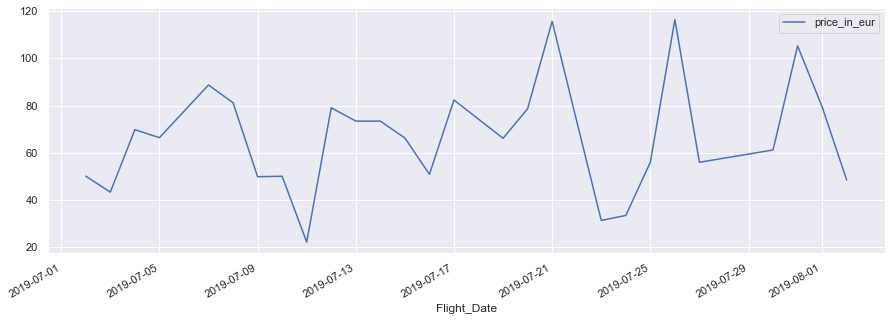

In [153]:
print("The average price for the time of the flight")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date'],)[['price_in_eur']].median().plot(ax=ax, figsize=[15, 5])
ax.legend()
plt.show()

The average price for the time of the flight and same route in euro


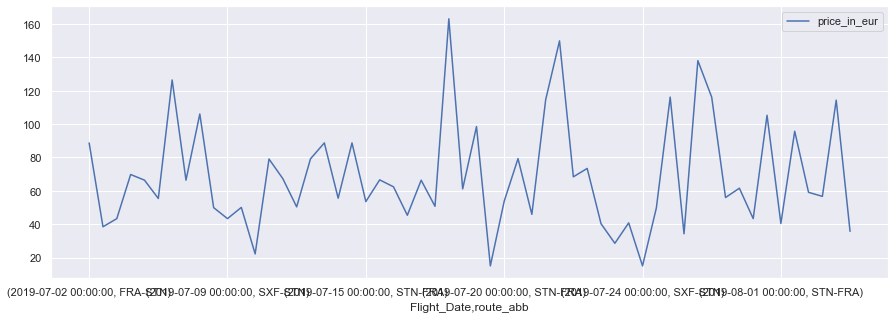

In [41]:
print("The average price for the time of the flight and same route in euro")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['price_in_eur']].median().plot(ax=ax, figsize=[15, 5])
ax.legend()
plt.show()

Plot how many flights per route


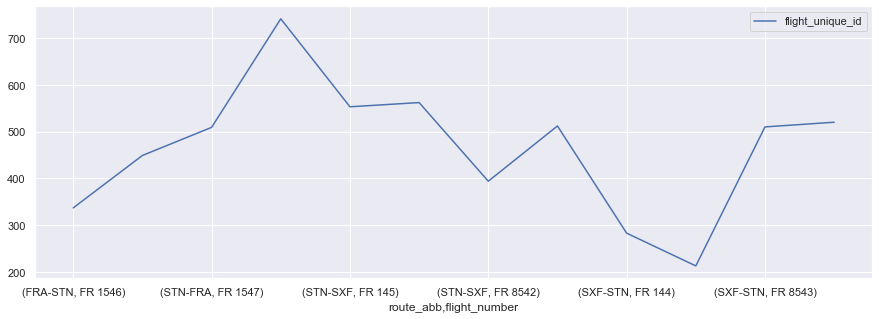

In [155]:
print("Plot how many flights per route")
fig, ax = plt.subplots()
df = data.groupby(['route_abb','flight_number']).count()['flight_unique_id'].plot(ax=ax, figsize=[15, 5])
ax.legend()
plt.show()